In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np 
from keras.optimizers import SGD

## Explore data

In [26]:
(train_X, train_Y), (test_X, test_Y)=fashion_mnist.load_data()

In [27]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


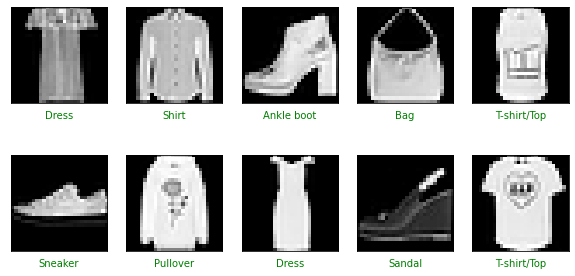

In [28]:
Class_label=['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']
rand_arr=np.random.choice(range(train_X.shape[0]),10)
plt.figure(figsize=(10,5))
for i, index in enumerate(rand_arr):
    plt.subplot(2,5,i+1)
    plt.imshow(train_X[index],cmap='gist_gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Class_label[train_Y[index]],color='green')
# plt.show()

## Data preprocessing

#### Scaling data from [0,255] -> [0,1]

In [29]:
train_X=train_X/255.0
test_X=test_X/255.0

#### One-hot encode tagert column

In [30]:
train_Y=to_categorical(train_Y)
test_Y=to_categorical(test_Y)
print(train_Y[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### Set shape Input

In [31]:
train_X=train_X.reshape(60000,28,28,1)
test_X=test_X.reshape(10000,28,28,1)

## Buil and train model

In [8]:
model= Sequential()

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer=SGD(learning_rate=0.03,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [10]:
history=model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.4668 - accuracy: 0.8293 - val_loss: 0.3302 - val_accuracy: 0.8741
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3058 - accuracy: 0.8879 - val_loss: 0.3093 - val_accuracy: 0.8839
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2666 - accuracy: 0.9018 - val_loss: 0.2734 - val_accuracy: 0.9011
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2443 - accuracy: 0.9092 - val_loss: 0.2778 - val_accuracy: 0.9019
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2258 - accuracy: 0.9156 - val_loss: 0.2895 - val_accuracy: 0.8948
Epoch 6/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.2099 - accuracy: 0.9199 - val_loss: 0.2682 - val_accuracy: 0.9049
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1942 - accuracy: 0.9273 - val_loss: 0.2707 -

In [11]:
model.save('my_model.h5')

## Model prediction and evaluation

In [12]:
test_evaluation=model.evaluate(test_X, test_Y)

313/313 [==============================] - 3s 9ms/step - loss: 0.2854 - accuracy: 0.9068


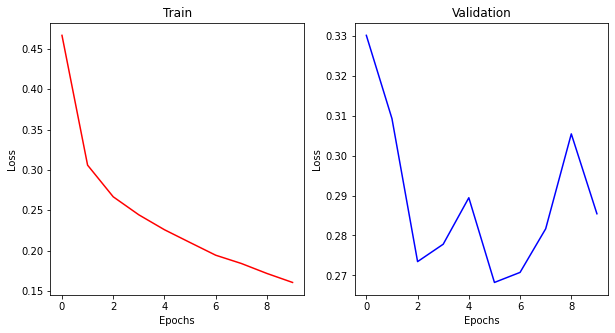

In [13]:
loss_train = history.history['loss']
loss_val = history.history['val_loss'] 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.title('Train') 
plt.plot(loss_train, color='red') 
plt.subplot(1, 2, 2) 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.title('Validation') 
plt.plot(loss_val, color='blue') 
plt.show() 

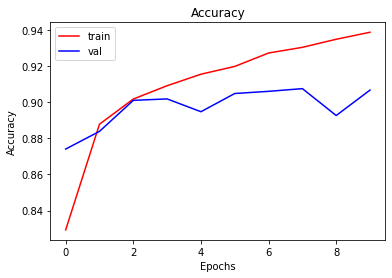

In [14]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy'] 
plt.plot(acc_train, color='red',label='train') 
plt.plot(acc_val, color='blue',label='val') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Accuracy') 
plt.legend()


In [15]:
y_hat=model.predict(test_X)
y_hat

313/313 [==============================] - 3s 10ms/step


array([[3.5781441e-06, 1.1000075e-06, 9.0613291e-08, ..., 3.6586408e-04,
        5.3633375e-08, 9.9956554e-01],
       [7.0049842e-05, 5.0771345e-11, 9.9985373e-01, ..., 3.4673359e-10,
        3.4695226e-08, 8.9129946e-11],
       [1.3320765e-12, 1.0000000e+00, 3.2660708e-12, ..., 1.0582108e-15,
        9.4032422e-15, 1.9198368e-16],
       ...,
       [9.4743636e-13, 1.8162659e-15, 1.6497036e-14, ..., 5.5944426e-14,
        1.0000000e+00, 5.7040534e-14],
       [2.8955587e-13, 1.0000000e+00, 7.3388290e-15, ..., 5.2933050e-15,
        1.4236524e-15, 2.4076670e-15],
       [1.5500969e-03, 2.3339220e-05, 5.5336842e-04, ..., 3.8183987e-01,
        1.3940799e-02, 2.1683155e-02]], dtype=float32)

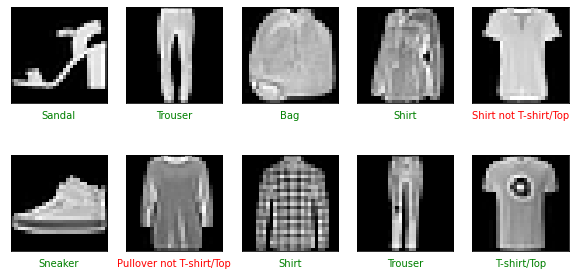

In [22]:
y_lable_predict=np.argmax(y_hat,axis=1)
y_lable_true=np.argmax(test_Y,axis=1)
Class_label=['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']
rand_arr=np.random.choice(range(test_X.shape[0]),10)
plt.figure(figsize=(10,5))
for i, index in enumerate(rand_arr):
    plt.subplot(2,5,i+1)
    plt.imshow(test_X[index].reshape(28,28),cmap='gist_gray')
    plt.xticks([])
    plt.yticks([])
    if y_lable_predict[index] == y_lable_true[index]:
        plt.xlabel(Class_label[ y_lable_predict[index]],color='green')
    else:
        plt.xlabel(f"{Class_label[ y_lable_true[index]] } not {Class_label[ y_lable_predict[index]] }",color='red')

In [18]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_lable_true,y_lable_predict)
print(conf_mat)

[[853   0  14  17   6   2 104   0   4   0]
 [  2 980   0  12   3   0   1   0   2   0]
 [ 20   1 858   7  86   0  28   0   0   0]
 [ 16   3   7 918  34   0  22   0   0   0]
 [  1   0  63  21 880   0  35   0   0   0]
 [  0   0   0   0   0 972   0  21   0   7]
 [103   0  80  26 101   0 684   0   6   0]
 [  0   0   0   0   0   3   0 980   0  17]
 [  6   0   2   3   1   1   9   0 977   1]
 [  0   0   0   0   0   4   1  29   0 966]]
